### Importing Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk import word_tokenize, sent_tokenize , pos_tag 
from nltk.corpus import stopwords 
from nltk.util import ngrams 

### Importing Dataset 

In [21]:
df = pd.read_csv(r"C:\Users\MADAN JUMAANI\OneDrive\Desktop\datas.csv")
print(df.Class.unique())

['Weakness' 'Fever' 'BasicNeed' 'Desire' 'Acidity' 'greetword' 'Cancer'
 'stomachProblem' 'eyecheckup']


In [25]:
df

,Sentences,Class
0,Take a pill and some rest.,Weakness
1,I have headache and fever since last night.,Fever
2,I am checking your body temperature.,Fever
3,I can't get up I feel weakness.,Weakness
4,Take a pill and have some rest.,Weakness
...,...,...
198,"Yes, it was. And because I�ve taken these test...",eyecheckup
199,Your reports are absolutely fine.,eyecheckup
200,OK.,greetword
201,Thank you doctor. Thanks for your time.,eyecheckup


### Plot a histogram 

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

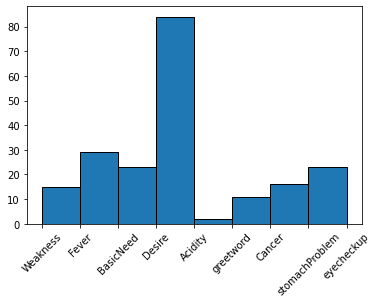

In [23]:
plt.hist(df['Class'], edgecolor='black', bins=8)
plt.xticks(rotation=45)



### Identify frequent and non-frequent words 

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
v = TfidfVectorizer()
x = v.fit_transform(df['Sentences'])

print(x[0:10])

  (0, 298)	0.5008065912010754
  (0, 329)	0.4270847576401852
  (0, 10)	0.3432259121873665
  (0, 265)	0.5245397206309361
  (0, 349)	0.4169477457482567
  (1, 233)	0.4207036459199629
  (1, 186)	0.38611591675480816
  (1, 319)	0.40166864497051546
  (1, 128)	0.4207036459199629
  (1, 159)	0.4207036459199629
  (1, 156)	0.28778793265281605
  (1, 10)	0.27528209390462305
  (2, 355)	0.4492921506566433
  (2, 42)	0.4980340149711718
  (2, 424)	0.3581193373957299
  (2, 61)	0.5367226092080521
  (2, 8)	0.365756837582248
  (3, 405)	0.5328512538773673
  (3, 125)	0.38038989305924126
  (3, 387)	0.5328512538773673
  (3, 142)	0.4460514271755775
  (3, 52)	0.2974571163304792
  (4, 156)	0.33773469789508864
  (4, 298)	0.47137987063099757
  (4, 329)	0.4019898326858705
  (4, 10)	0.32305842001014684
  (4, 265)	0.4937184733508342
  (4, 349)	0.3924484579552739
  (5, 402)	0.47157492072141105
  (5, 242)	0.3893725225334576
  (5, 144)	0.606694601277239
  (5, 225)	0.5078659209117884
  (6, 177)	0.5495296687509151
  (6, 179)	

### Bag of Words and the Removing them from Dataset 

In [26]:
cStopWords = ['', 'I' , 'a','i','are','of' , 'is','you','You','Ok', 'and','be','Did','this','It' ,'at', 'has', 'had', 'having','feel','want', 'vomit','.', ',' , 'when', 'will' , 'do', 'does','The','the','and', 'but', 'if', 'or', 'because', 'as', 'us']
cStopWords?
df['without_stopwords'] = df['Sentences'].apply(lambda x: ' '.join([word for word in x.split() if word not in (cStopWords)]))

In [27]:
DataFrame_with_stopwords = df['without_stopwords']
DataFrame_with_stopwords[0: 20]

0                       Take pill some rest.
1      have headache fever since last night.
2         am checking your body temperature.
3                     can't get up weakness.
4                  Take pill have some rest.
5                          need glass water.
6                                Here it is.
7     need some medicine for fever headache.
8                                Here it is.
9                                 some food.
10                               Here it is.
11                           to go washroom.
12                                   may go.
13                      Can please open fan.
14                               Yes course.
15                   Can please oepn window.
16                                       Ok.
17              Can please give me my phone.
18                               Here it is.
19                  to some simple exercise.
Name: without_stopwords, dtype: object

### POS tags 

In [28]:
from nltk.util import ngrams 
from nltk import word_tokenize, sent_tokenize , pos_tag_sents 

import re
import collections


def tokenize(text_data):
    tokens = re.split('\W+',text_data)
    return tokens
tokenized = DataFrame_with_stopwords.apply(lambda x: tokenize(x.lower()))

In [29]:
texts = str(df['Sentences'].tolist())
unigrams = ngrams(texts.split(), 1)
bigrams = ngrams(texts.split(),2)
trigrams = ngrams(texts.split(),3)
df['POS'] = pos_tag_sents( df['Sentences'].apply(word_tokenize).tolist() )
df['POS']

0      [(Take, VB), (a, DT), (pill, NN), (and, CC), (...
1      [(I, PRP), (have, VBP), (headache, VBN), (and,...
2      [(I, PRP), (am, VBP), (checking, VBG), (your, ...
3      [(I, PRP), (ca, MD), (n't, RB), (get, VB), (up...
4      [(Take, VB), (a, DT), (pill, NN), (and, CC), (...
                             ...                        
198    [(Yes, UH), (,, ,), (it, PRP), (was, VBD), (.,...
199    [(Your, PRP$), (reports, NNS), (are, VBP), (ab...
200                                   [(OK, UH), (., .)]
201    [(Thank, NNP), (you, PRP), (doctor, VBP), (., ...
202               [(You�re, NNP), (welcome, NN), (., .)]
Name: POS, Length: 203, dtype: object

In [30]:
tokenized

0                             [take, pill, some, rest, ]
1          [have, headache, fever, since, last, night, ]
2              [am, checking, your, body, temperature, ]
3                          [can, t, get, up, weakness, ]
4                       [take, pill, have, some, rest, ]
                             ...                        
198    [yes, it, was, and, i, ve, taken, these, tests...
199                  [your, reports, absolutely, fine, ]
200                                               [ok, ]
201           [thank, doctor, thanks, for, your, time, ]
202                                 [you, re, welcome, ]
Name: without_stopwords, Length: 203, dtype: object

### Trigram 

In [31]:
for each in trigrams:
    print(each)

("['Take", 'a', 'pill')
('a', 'pill', 'and')
('pill', 'and', 'some')
('and', 'some', "rest.',")
('some', "rest.',", "'I")
("rest.',", "'I", 'have')
("'I", 'have', 'headache')
('have', 'headache', 'and')
('headache', 'and', 'fever')
('and', 'fever', 'since')
('fever', 'since', 'last')
('since', 'last', "night.',")
('last', "night.',", "'I")
("night.',", "'I", 'am')
("'I", 'am', 'checking')
('am', 'checking', 'your')
('checking', 'your', 'body')
('your', 'body', "temperature.',")
('body', "temperature.',", '"I')
("temperature.',", '"I', "can't")
('"I', "can't", 'get')
("can't", 'get', 'up')
('get', 'up', 'I')
('up', 'I', 'feel')
('I', 'feel', 'weakness.",')
('feel', 'weakness.",', "'Take")
('weakness.",', "'Take", 'a')
("'Take", 'a', 'pill')
('a', 'pill', 'and')
('pill', 'and', 'have')
('and', 'have', 'some')
('have', 'some', "rest.',")
('some', "rest.',", "'I")
("rest.',", "'I", 'need')
("'I", 'need', 'glass')
('need', 'glass', 'of')
('glass', 'of', "water.',")
('of', "water.',", "'Here

("lights.',", "'ok.',", "'I")
("'ok.',", "'I", 'want')
("'I", 'want', 'to')
('want', 'to', "sleep.',")
('to', "sleep.',", "'ok.',")
("sleep.',", "'ok.',", "'Hello!")
("'ok.',", "'Hello!", 'What')
("'Hello!", 'What', 'can')
('What', 'can', 'I')
('can', 'I', 'do')
('I', 'do', 'for')
('do', 'for', "you?',")
('for', "you?',", "'Good")
("you?',", "'Good", 'Morning')
("'Good", 'Morning', 'Doctor.')
('Morning', 'Doctor.', 'I')
('Doctor.', 'I', 'don�t')
('I', 'don�t', 'feel')
('don�t', 'feel', "good.',")
('feel', "good.',", "'Come")
("good.',", "'Come", 'and')
("'Come", 'and', 'sit')
('and', 'sit', "here.',")
('sit', "here.',", "'Open")
("here.',", "'Open", 'your')
("'Open", 'your', "mouth.',")
('your', "mouth.',", "'Since")
("mouth.',", "'Since", 'how')
("'Since", 'how', 'long')
('how', 'long', 'are')
('long', 'are', 'you')
('are', 'you', 'not')
('you', 'not', 'feeling')
('not', 'feeling', "well?',")
('feeling', "well?',", "'Since")
("well?',", "'Since", "yesterday.',")
("'Since", "yesterday.

('xxx', 'and', 'you�ll')
('and', 'you�ll', 'get')
('you�ll', 'get', 'the')
('get', 'the', 'reports')
('the', 'reports', 'in')
('reports', 'in', 'around')
('in', 'around', 'two')
('around', 'two', 'hours.')
('two', 'hours.', 'Is')
('hours.', 'Is', 'that')
('Is', 'that', "fine?',")
('that', "fine?',", "'That�s")
("fine?',", "'That�s", "fine.',")
("'That�s", "fine.',", "'�Please")
("fine.',", "'�Please", 'be')
("'�Please", 'be', 'seated')
('be', 'seated', 'there.')
('seated', 'there.', 'Someone')
('there.', 'Someone', 'will')
('Someone', 'will', 'call')
('will', 'call', 'you')
('call', 'you', 'for')
('you', 'for', 'the')
('for', 'the', 'first')
('the', 'first', 'test')
('first', 'test', 'in')
('test', 'in', 'few')
('in', 'few', "minutes.',")
('few', "minutes.',", "'Thank")
("minutes.',", "'Thank", "you.',")
("'Thank", "you.',", "'I")
("you.',", "'I", 'hope')
("'I", 'hope', 'you')
('hope', 'you', 'had')
('you', 'had', 'a')
('had', 'a', 'smooth')
('a', 'smooth', 'experience')
('smooth', 'ex

### Wordcloud 

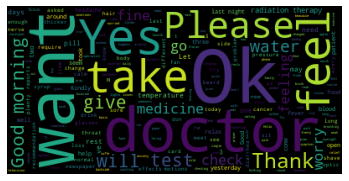

In [32]:
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from wordcloud import WordCloud

text = df['Sentences'].values

wordcloud = WordCloud().generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Applying Naive Bayes Classifier

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
X_train, X_test, y_train, y_test = train_test_split(df['Sentences'], df['Class'])
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [34]:
print(clf.predict(count_vect.transform(["I am suffering from stomachache and motions since last night."])))
print(clf.predict(count_vect.transform(["OK. I’ve heard radiation therapy has side effects."])))
print(clf.predict(count_vect.transform(["Temperature is not too high, around 99.8. Let me check your blood pressure as well."])))
print(clf.predict(count_vect.transform(["You have a moderate fever. Let me check your temperature."])))
print(clf.predict(count_vect.transform(["No one Doctor. I took it myself."])))



['Fever']
['Cancer']
['Fever']
['Fever']
['Desire']


In [15]:
df.dttypes()

AttributeError: 'DataFrame' object has no attribute 'dttypes'